In [35]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
type(df)

numpy.ndarray

In [38]:
X = df[:, 2]
y = df[:, -1]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# X_train.shape
print(X_train)

[0.16674889 0.49531327 0.46077948 0.6822891  0.21953626 0.64232856
 0.70942279 0.46817958 0.57128762 0.23828318 0.3078441  0.2150962
 0.71090281 0.42723236 0.44055254 0.48692649 0.35668476 0.73211643
 0.50715343 0.69116922 0.48544647 0.58164776 0.4647262  0.27824371
 1.         0.         0.41736556 0.47360631 0.5821411  0.28712383
 0.24568328 0.71336951 0.31475086 0.22200296 0.63394179 0.26985693
 0.59003453 0.3127775  0.38085841 0.78342378 0.38628515 0.52836704
 0.47952639 0.41983226 0.46423286 0.35323138 0.29057721 0.36211149
 0.33596448 0.13270844 0.61272817 0.4227923  0.52639369 0.38727183
 0.17316231 0.84361125 0.20966946 0.31179082 0.64923532 0.4573261
 0.84953133 0.36063148 0.55796744 0.38431179 0.73014307 0.56536754
 0.07104095 0.47804637 0.25061667 0.58559447 0.56388752 0.55895412
 0.17118895 0.425259   0.5772077  0.38233843 0.45584608 0.45781944
 0.63542181 0.65959546 0.02614702 0.24370992 0.3300444  0.32708436
 0.38332511 0.53971386 0.17858905 0.44153922 0.26048347 0.302910

In [40]:
X_train = np.c_[np.ones((len(X_train), 1), dtype='int'), X_train]
X_test = np.c_[np.ones((len(X_test), 1), dtype='int'), X_test]
print(X_train)

[[1.         0.16674889]
 [1.         0.49531327]
 [1.         0.46077948]
 [1.         0.6822891 ]
 [1.         0.21953626]
 [1.         0.64232856]
 [1.         0.70942279]
 [1.         0.46817958]
 [1.         0.57128762]
 [1.         0.23828318]
 [1.         0.3078441 ]
 [1.         0.2150962 ]
 [1.         0.71090281]
 [1.         0.42723236]
 [1.         0.44055254]
 [1.         0.48692649]
 [1.         0.35668476]
 [1.         0.73211643]
 [1.         0.50715343]
 [1.         0.69116922]
 [1.         0.48544647]
 [1.         0.58164776]
 [1.         0.4647262 ]
 [1.         0.27824371]
 [1.         1.        ]
 [1.         0.        ]
 [1.         0.41736556]
 [1.         0.47360631]
 [1.         0.5821411 ]
 [1.         0.28712383]
 [1.         0.24568328]
 [1.         0.71336951]
 [1.         0.31475086]
 [1.         0.22200296]
 [1.         0.63394179]
 [1.         0.26985693]
 [1.         0.59003453]
 [1.         0.3127775 ]
 [1.         0.38085841]
 [1.         0.78342378]


In [41]:
def cost_func(theta, X, y):
    m = len(X)
    pred = X.dot(theta)
    cost = (1/m) * np.sum(np.square(pred - y))
    return cost**(1/2)

In [42]:
def gradientDescent(X_train, X_test, y_train, y_test, alpha, epochs):
    m = len(y_train)
    theta = np.zeros(X_train.shape[1]).T
    print(theta)
    rmse_train = np.empty(epochs)
    rmse_test = np.empty(epochs)
    it = np.arange(epochs)
    for i in range(epochs):
        pred = np.dot(X_train, theta)
        theta = theta - (1 / m) * alpha * (X_train.T.dot((pred - y_train)))
        rmse_train[i] = cost_func(theta, X_train, y_train)
        rmse_test[i] = cost_func(theta, X_test, y_test)
    plt.plot(it, rmse_train, c='red', label='Training RMSE')
    plt.plot(it, rmse_test, c='green', label='Testing RMSE')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    print(theta)
    return theta, rmse_train, rmse_test

[0. 0.]


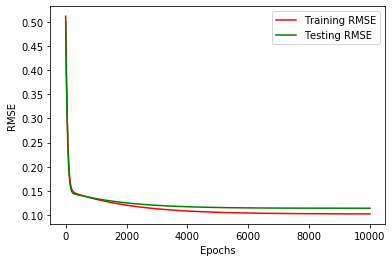

[0.1408238  0.75996093]


In [43]:
theta, rmse_train, rmse_test = gradientDescent(X_train, X_test, y_train, y_test, 0.01, 10000)

In [44]:
X_train = X_train[:, 1]


In [45]:
theta, rmse_train

(array([0.1408238 , 0.75996093]),
 array([0.51121038, 0.50556093, 0.49998582, ..., 0.10244914, 0.10244902,
        0.10244889]))

In [46]:
from numpy.linalg import pinv
Q = y @ pinv(X)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [ ]:
plt.scatter(X_train, y_train)
y_pred = theta[0] + theta[1] * X_train
plt.plot(X_train, y_pred, color='r', label='Gradient Descent', c='red')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()